### Accessing the yfinance module/API (API Access)

Here, we are creating the dataframe for the Apple ticker data. We are downloading the data into a DataFrame, reducing the complexity of the column levels for merging later on, and reseting the index (which is on 'Date', which we are joining our DataFrames on). Then, we visualize the data below with head().

In [183]:
import yfinance as y
import pandas as pd
import os

df_apple = y.download('AAPL')
df_apple.columns = df_apple.columns.droplevel(1)
df_apple.reset_index(inplace=True)
df_apple.head()



[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


Now, we are creating the dataframe for the Fidelity ticker data. We are again downloading the data into a DataFrame, reducing the complexity of the column levels for merging later on, and reset the index. Then, we visualize the data below with head().

In [184]:
df_fidelity = y.download('FNF')
df_fidelity.columns = df_fidelity.columns.droplevel(1)
df_fidelity.reset_index(inplace=True)
df_fidelity.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2005-10-14,7.209128,14.844195,14.844195,14.844195,14.844195,701
1,2005-10-17,6.432758,13.245590,14.273265,13.245590,14.273265,380256
2,2005-10-18,6.072305,12.503380,13.302683,12.103728,13.302683,1977123
3,2005-10-19,6.210939,12.788845,12.988671,11.846810,12.275008,2039477
4,2005-10-20,6.100029,12.560473,12.960124,12.309264,12.646113,1019739


Lastly, we create the dataframe for the Netflix ticker data. We are downloading the data into a DataFrame, reducing the complexity of the column levels for merging later on, and reset the index. Then, we visualize the data below with head().

In [185]:
df_netflix = y.download('NFLX')
df_netflix.columns = df_netflix.columns.droplevel(1)
df_netflix.reset_index(inplace=True)
df_netflix.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2002-05-23,1.196429,1.196429,1.242857,1.145714,1.156429,104790000
1,2002-05-24,1.210000,1.210000,1.225000,1.197143,1.214286,11104800
2,2002-05-28,1.157143,1.157143,1.232143,1.157143,1.213571,6609400
3,2002-05-29,1.103571,1.103571,1.164286,1.085714,1.164286,6757800
4,2002-05-30,1.071429,1.071429,1.107857,1.071429,1.107857,10154200


### Accessing the Commodities CSV, Merging, and Preprocessing the data

Here, we are reading into our commodities data, using the read_csv() function from the pandas module, reseting the index, and visualizing it with head().

In [210]:
df_comm = pd.read_csv("commodity_futures.csv").reset_index().drop(columns=['index'])
df_comm.reset_index(inplace=True)
df_comm.head()



,index,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,0,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
1,1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2,2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
3,3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
4,4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96


Here, we are changing the datetime type of each of the  'Date' columns in the stock (Apple, Fidelity, and Netflix) DataFrames. Afterwards, we merged the commodities DataFrame with each of the stock DataFrames, resulting in three dataframes (each one containing the commodities data and one of the company's stock data). We also made sure to drop columns that had NA values, like the gasoline column, or added no value to the code, such as the index column.

In [187]:
from dateutil.parser import isoparse

df_apple['Date'] = pd.to_datetime(df_apple['Date']).dt.date
df_comm['Date'] = pd.to_datetime(df_comm['Date']).dt.date
merged_apple = pd.merge(df_apple, df_comm, how='inner', on='Date').drop(columns=['index', 'GASOLINE'])
merged_apple

df_fidelity['Date'] = pd.to_datetime(df_fidelity['Date']).dt.date
df_comm['Date'] = pd.to_datetime(df_comm['Date']).dt.date
merged_fidelity = pd.merge(df_fidelity, df_comm, how='inner', on='Date').drop(columns=['index', 'GASOLINE'])
merged_fidelity

df_netflix['Date'] = pd.to_datetime(df_netflix['Date']).dt.date
df_comm['Date'] = pd.to_datetime(df_comm['Date']).dt.date
merged_netflix= pd.merge(df_netflix, df_comm, how='inner', on='Date').drop(columns=['index', 'GASOLINE'])
merged_netflix

,Date,Adj Close,Close,High,Low,Open,Volume,NATURAL GAS,GOLD,WTI CRUDE,...,SOYBEAN MEAL,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2002-05-23,1.196429,1.196429,1.242857,1.145714,1.156429,104790000,3.438,322.8,26.15,...,162.5,758.75,66.50,6611.0,271.50,5.62,50.70,48.525,284.00,37.30
1,2002-05-24,1.210000,1.210000,1.225000,1.197143,1.214286,11104800,3.347,320.7,25.88,...,163.7,757.25,65.95,6621.0,269.25,5.65,51.40,48.375,280.75,36.94
2,2002-05-28,1.157143,1.157143,1.232143,1.157143,1.213571,6609400,3.280,324.1,25.27,...,164.2,764.50,63.99,6712.0,272.00,5.67,50.60,46.375,281.50,38.25
3,2002-05-29,1.103571,1.103571,1.164286,1.085714,1.164286,6757800,3.420,325.5,25.76,...,165.3,758.25,65.31,6702.0,276.25,5.77,51.65,46.425,286.50,38.15
4,2002-05-30,1.071429,1.071429,1.107857,1.071429,1.107857,10154200,3.222,325.5,24.67,...,167.1,762.00,62.15,6602.0,276.50,5.78,51.60,46.150,286.75,38.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5332,2023-07-31,438.970001,438.970001,439.130005,426.299988,426.510010,6587600,2.634,1970.5,81.80,...,451.2,2571.31,299.09,22127.0,665.75,24.11,164.65,104.125,812.75,85.44
5333,2023-08-01,438.619995,438.619995,445.250000,431.399994,437.369995,5711500,2.560,1940.7,81.37,...,456.1,2574.80,302.34,22189.0,652.25,24.39,164.55,103.675,804.50,86.87
5334,2023-08-02,429.700012,429.700012,435.559998,426.559998,435.230011,4912200,2.477,1937.4,79.49,...,451.8,2486.50,300.43,21379.0,640.00,24.20,166.95,102.675,787.00,85.08
5335,2023-08-03,431.000000,431.000000,441.929993,427.190002,427.799988,6243900,2.565,1932.0,81.55,...,451.2,2494.00,307.49,21402.0,627.00,24.02,164.75,101.000,767.50,85.28


Since all of our commodities data values are in Euros, we need to convert those values into USD so that we can properly compare those values (and to reduce any oversight or bias within the data). Here, we are downloading the Euro to USD forex rates for each day using yfinance, with our bounds being Apple's IPO date and the current date. Then, we drop a level (for future merging), reset the index, and drop irrelevant columns. Since we are going to use the closing price (the adjusted closing price) as the assumed forex rate, we keep the related columns, and drop the others ('High', 'Low', 'Open', 'Volume'). We kept the 'Closing' column, but it is not necessary.

In [188]:
eurusd = y.download('EURUSD=X', start=merged_apple['Date'].iloc[0], end=merged_apple['Date'].iloc[-1])
eurusd.columns = eurusd.columns.droplevel(1)
eurusd.reset_index(inplace=True)
adj_eur =  eurusd.drop(columns=['High','Low', 'Open', 'Volume'])
adj_eur.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close
0,2003-12-01,1.196501,1.196501
1,2003-12-02,1.208897,1.208897
2,2003-12-03,1.212298,1.212298
3,2003-12-04,1.208094,1.208094
4,2003-12-05,1.218695,1.218695


Here, we are merging the forex DataFrame with the merged DataFrames we created earlier, and changing some of the column names to better represent their function within the DataFrame. For example, we changed 'Adj Close_y' to 'adj_forex_rate' to show that we are using it as our forex rate. In the code block afterwards, we multiply the daily forex rate times the commidity price for each day, turning the commodity prices from EUR to USD.

In [189]:
merged_apple['Date'] = pd.to_datetime(merged_apple['Date'])
merged_apple_usd = pd.merge(merged_apple, adj_eur, how='inner', on='Date')
merged_apple_usd.rename(columns={'Adj Close_y':'adj_forex_rate', 'Close_y':'forex_rate', 'Adj Close_x':'Adj Close', 'Close_x':'Close'},inplace=True)
merged_apple_usd.head()

merged_fidelity['Date'] = pd.to_datetime(merged_fidelity['Date'])
merged_fidelity_usd = pd.merge(merged_fidelity, adj_eur, how='inner', on='Date')
merged_fidelity_usd.rename(columns={'Adj Close_y':'adj_forex_rate', 'Close_y':'forex_rate', 'Adj Close_x':'Adj Close', 'Close_x':'Close'},inplace=True)
merged_fidelity_usd.head()

merged_netflix['Date'] = pd.to_datetime(merged_netflix['Date'])
merged_netflix_usd = pd.merge(merged_netflix, adj_eur, how='inner', on='Date')
merged_netflix_usd.rename(columns={'Adj Close_y':'adj_forex_rate', 'Close_y':'forex_rate', 'Adj Close_x':'Adj Close', 'Close_x':'Close'},inplace=True)
merged_netflix_usd.head()

,Date,Adj Close,Close,High,Low,Open,Volume,NATURAL GAS,GOLD,WTI CRUDE,...,ULS DIESEL,NICKEL,WHEAT,SUGAR,COFFEE,LEAN HOGS,HRW WHEAT,COTTON,adj_forex_rate,forex_rate
0,2003-12-01,3.621429,3.621429,3.642857,3.513571,3.530000,18172000,5.283,402.7,29.95,...,83.40,12568.0,395.75,6.29,59.60,51.025,410.0,68.25,1.196501,1.196501
1,2003-12-02,3.635714,3.635714,3.701429,3.571429,3.603571,15824200,5.579,403.7,30.78,...,86.26,12603.0,395.75,6.38,62.00,50.100,410.0,68.50,1.208897,1.208897
2,2003-12-03,3.555000,3.555000,3.732857,3.539286,3.675000,18349800,5.756,403.9,31.10,...,86.62,12815.0,402.00,6.58,62.50,49.475,415.0,68.20,1.212298,1.212298
3,2003-12-04,3.431429,3.431429,3.617857,3.332857,3.570714,28826000,6.337,403.3,31.26,...,88.19,12698.0,399.50,6.71,60.95,49.125,410.0,67.00,1.208094,1.208094
4,2003-12-05,3.390714,3.390714,3.462857,3.335000,3.403571,12567800,6.135,406.4,30.73,...,86.36,12791.0,391.00,6.65,61.90,49.050,400.0,67.74,1.218695,1.218695


In [190]:
for i in range(7,len(merged_apple_usd.columns) - 2):
        merged_apple_usd.iloc[:, i] *= merged_apple_usd['adj_forex_rate']
        merged_fidelity_usd.iloc[:, i] *= merged_fidelity_usd['adj_forex_rate']
        merged_netflix_usd.iloc[:, i] *= merged_netflix_usd['adj_forex_rate']

merged_fidelity_usd.head()

,Date,Adj Close,Close,High,Low,Open,Volume,NATURAL GAS,GOLD,WTI CRUDE,...,ULS DIESEL,NICKEL,WHEAT,SUGAR,COFFEE,LEAN HOGS,HRW WHEAT,COTTON,adj_forex_rate,forex_rate
0,2005-10-14,7.209128,14.844195,14.844195,14.844195,14.844195,701,15.964591,566.653014,75.638274,...,235.501572,14724.282932,409.410426,14.081786,120.347342,81.368813,460.133842,68.754382,1.207700,1.207700
1,2005-10-17,6.432758,13.245590,14.273265,13.245590,14.273265,380256,16.679679,569.441619,77.302811,...,238.214209,14643.814007,403.869952,13.764609,125.034534,72.456371,456.418087,67.261613,1.201100,1.201100
2,2005-10-18,6.072305,12.503380,13.302683,12.103728,13.302683,1977123,16.044807,564.395614,75.555609,...,231.233636,14752.471671,393.020670,13.975397,125.109089,72.148433,445.921551,66.194842,1.195500,1.195500
3,2005-10-19,6.210939,12.788845,12.988671,11.846810,12.275008,2039477,16.223627,554.996767,74.729985,...,229.111287,14434.705545,392.449170,14.045549,124.589889,73.131451,442.440788,65.007065,1.197404,1.197404
4,2005-10-20,6.100029,12.560473,12.960124,12.309264,12.646113,1019739,15.595669,554.026607,73.345431,...,224.723287,14547.705168,399.295749,13.976853,127.029528,72.377988,448.268817,63.947409,1.201793,1.201793


### Apple Analysis using Decision Trees

Here, we create a Decision Tree for the merged, USD Apple DataFrame, and visualized it using Matplotlib. We used a Decision Tree as it one of the regression/classification models used in our course for non-linear relationships. This works for us, as we wanted to see the relationship between the commodities we have and the stocks we were looking at, which could have a linear or non-linear relationship (more often than not, non-linear). For our model, we're training the data on the commodities (which are all listed in the df_comm DataFrame) and on the Adj Closing price of each of the stocks. We left out the forex rate as we only used it for conversion purposes, and we also left out other of the stock's financial data as that already has a relationship with our adjusted closing data that we are not looking to test.

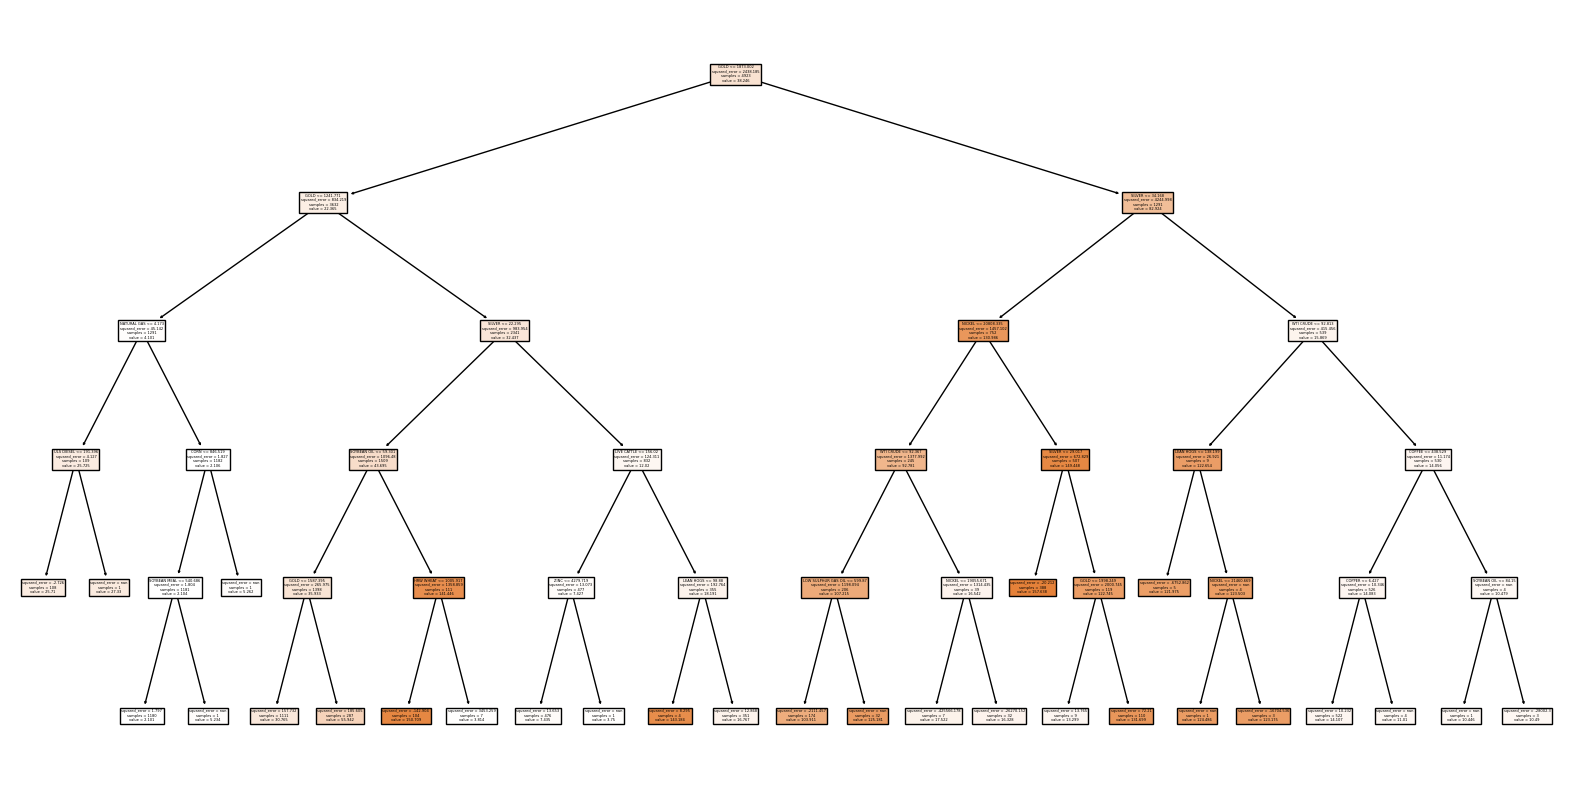

In [191]:
X_train = merged_apple_usd[['NATURAL GAS', 'GOLD', 'WTI CRUDE', 'BRENT CRUDE', 'SOYBEANS', 'CORN',
       'COPPER', 'SILVER', 'LOW SULPHUR GAS OIL', 'LIVE CATTLE', 'SOYBEAN OIL',
       'ALUMINIUM', 'SOYBEAN MEAL', 'ZINC', 'ULS DIESEL', 'NICKEL', 'WHEAT',
       'SUGAR', 'COFFEE', 'LEAN HOGS', 'HRW WHEAT', 'COTTON']]
Y_train = merged_apple_usd['Adj Close']

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, Y_train)

importances_apple = tree.feature_importances_

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X_train.columns, filled=True)
plt.show()






Here, we visualize the importance of each of the commidities towards the Apple stock. Here, we see that Gold and Silver hold more importance than the other commodities in our dataset. 

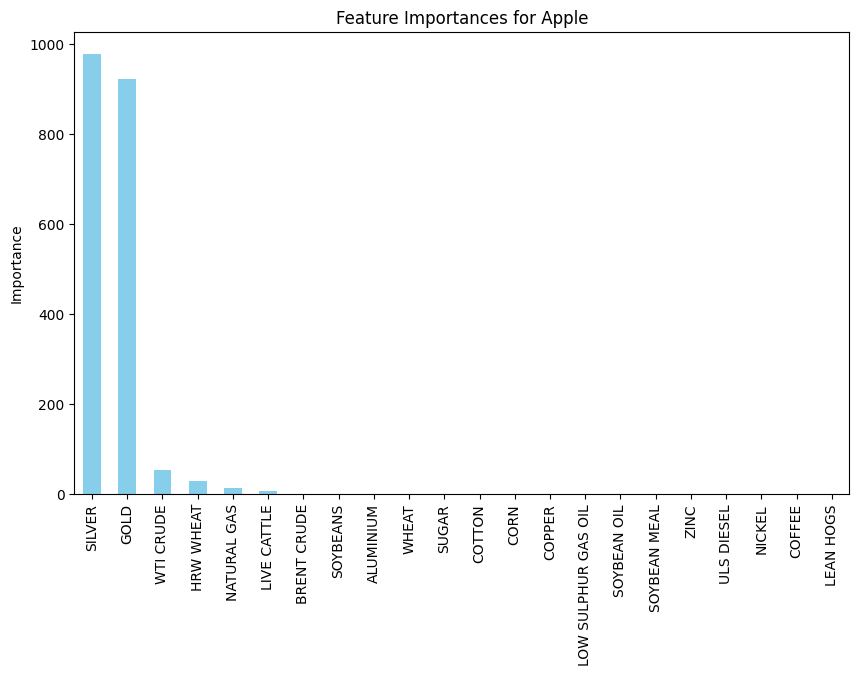

In [192]:
feature_importances_apple = pd.Series(importances_apple, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances_apple.plot(kind='bar', color='skyblue')
plt.title("Feature Importances for Apple")
plt.ylabel("Importance")
plt.show()

Here, we're printing some variables to show the accuracy of the Decision Tree model that we built. In particular, we are finding the MAE, MSE, RMSE, and R^2.

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

Y_pred = tree.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")



Mean Absolute Error (MAE): 5.912384286766299
Mean Squared Error (MSE): 83.93229458418293
Root Mean Squared Error (RMSE): 9.161457012079625
R² Score: 0.9672318699555232


### Testing the Statistical Association of Silver with Apple's Adjusted Closing Price

Here, we are looking at the correlation between gold, the most important commodity, and Apple's adjusted stock price using a Pearson correlation test. Here, we can see a correlation value of around .54 with a p-value of 0, signifying that the relationship between gold and Apple's adjusted closing stock price is moderately positive and is also statistically significant (because p=0).

In [194]:
from scipy.stats import pearsonr

merged_apple_usd_na = merged_apple_usd.dropna()
corr, p_value = pearsonr(merged_apple_usd_na['GOLD'], merged_apple_usd_na['Adj Close'])
print(f"Pearson Correlation: {corr}, P-Value: {p_value}")


Pearson Correlation: 0.5413861804184225, P-Value: 0.0


### Fidelity Analysis using Decision Trees

Here, we create a Decision Tree for the merged, USD Fidelity DataFrame, and visualized it using Matplotlib.

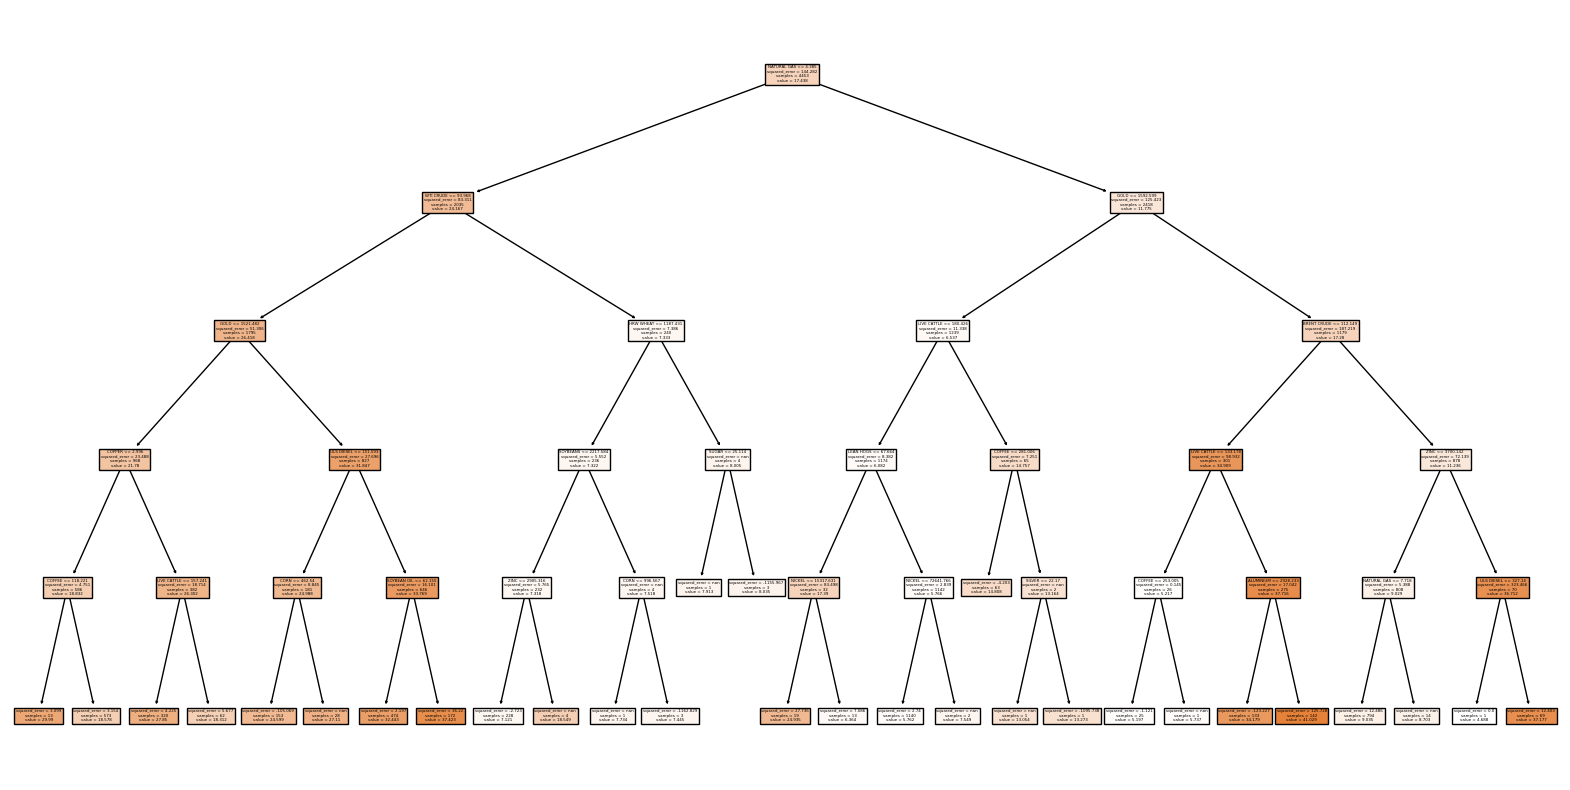

In [195]:
X_train = merged_fidelity_usd[['NATURAL GAS', 'GOLD', 'WTI CRUDE', 'BRENT CRUDE', 'SOYBEANS', 'CORN',
       'COPPER', 'SILVER', 'LOW SULPHUR GAS OIL', 'LIVE CATTLE', 'SOYBEAN OIL',
       'ALUMINIUM', 'SOYBEAN MEAL', 'ZINC', 'ULS DIESEL', 'NICKEL', 'WHEAT',
       'SUGAR', 'COFFEE', 'LEAN HOGS', 'HRW WHEAT', 'COTTON']]
Y_train = merged_fidelity_usd['Adj Close']

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, Y_train)

importances_fidelity = tree.feature_importances_

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X_train.columns, filled=True)
plt.show()

Here, we visualize the importance of each of the commidities towards the Fidelity stock. Here, we see that Gold and Brent Crude hold more importance than the other commodities in our dataset. 

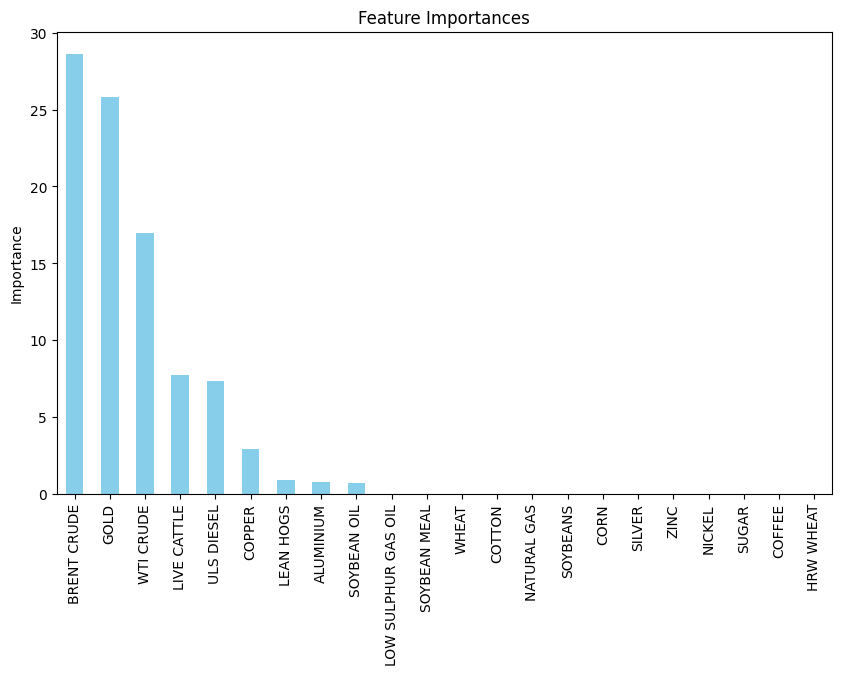

In [196]:
feature_importances_fidelity = pd.Series(importances_fidelity, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances_fidelity.plot(kind='bar', color='skyblue')
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.show()

Here, we're printing some variables to show the accuracy of the Decision Tree model that we built. In particular, we are finding the MAE, MSE, RMSE, and R^2.

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

Y_pred = tree.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 1.6793439162873043
Mean Squared Error (MSE): 6.286724422751028
Root Mean Squared Error (RMSE): 2.507334126667411
R² Score: 0.9556244934320874


### Testing the Statistical Association of BRENT CRUDE and Live Cattle with Fieldity's Adjusted Closing Price

Here, we are looking at the correlation between BRENT CRUDE (Crude Oil market based in Northwest Europe), the most important commodity, and Apple's adjusted stock price using a Pearson correlation test. We are also doing a correlation test between live cattle and Fidelity's adjusted stock price, as it is shown as a potentially important commodity without having an obvious correlation/causation. For Brent Crude Oil, we see that it has a statistically significant, moderately negative correlation with Fidelity's adjusted closing stock price. This means that when the price of Brent Crude Oil goes down, Fidelity's adjusted closing stock price goes up. For the live cattle, it appears to have a statistically significant, weak positive relationship with Fidelity;s adjusted closing stock price. This means that if the price of live cattle changes by some amount, Fidelity's stock price will change by a somewhat insignificant amount, if at all. Overall, the importance of the commodities as predictors/estimators for Fidelity's adjusted closing stock price is very low, so the correlation value is also going to be lower than those for Apple (which had correlations in the thousands).

In [198]:
from scipy.stats import pearsonr

merged_fidelity_usd_na = merged_fidelity_usd.dropna()
corr, p_value = pearsonr(merged_fidelity_usd_na['BRENT CRUDE'], merged_fidelity_usd_na['Adj Close'])
print(f"Pearson Brent Crude Correlation: {corr}, P-Value: {p_value}")

merged_fidelity_usd_na = merged_fidelity_usd.dropna()
corr, p_value = pearsonr(merged_fidelity_usd_na['LIVE CATTLE'], merged_fidelity_usd_na['Adj Close'])
print(f"Pearson Live Cattle Correlation: {corr}, P-Value: {p_value}")



Pearson Brent Crude Correlation: -0.42968355820636855, P-Value: 1.0716592623562364e-197
Pearson Live Cattle Correlation: 0.09168652270727352, P-Value: 1.0572379852139753e-09


### Netflix Analysis using Decision Trees

Here, we create a Decision Tree for the merged, USD Netflix DataFrame, and visualized it using Matplotlib.

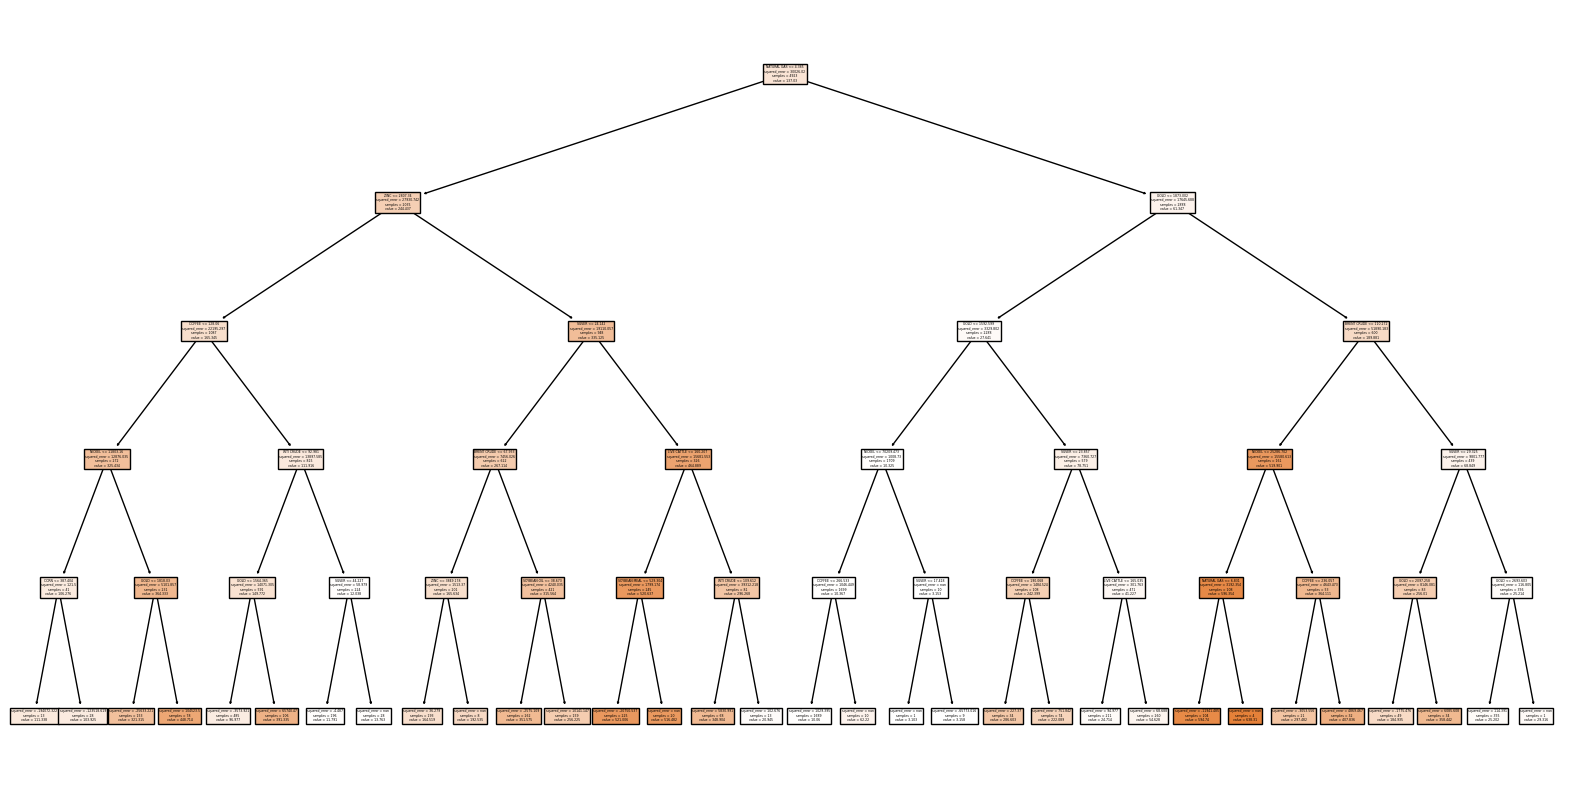

In [199]:
X_train = merged_netflix_usd[['NATURAL GAS', 'GOLD', 'WTI CRUDE', 'BRENT CRUDE', 'SOYBEANS', 'CORN',
       'COPPER', 'SILVER', 'LOW SULPHUR GAS OIL', 'LIVE CATTLE', 'SOYBEAN OIL',
       'ALUMINIUM', 'SOYBEAN MEAL', 'ZINC', 'ULS DIESEL', 'NICKEL', 'WHEAT',
       'SUGAR', 'COFFEE', 'LEAN HOGS', 'HRW WHEAT', 'COTTON']]
Y_train = merged_netflix_usd['Adj Close']

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, Y_train)

importances_netflix = tree.feature_importances_

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X_train.columns, filled=True)
plt.show()

Here, we visualize the importance of each of the commidities towards the Netflix stock. Here, we see that Brent Crude holds more importance than the other commodities in our dataset. 

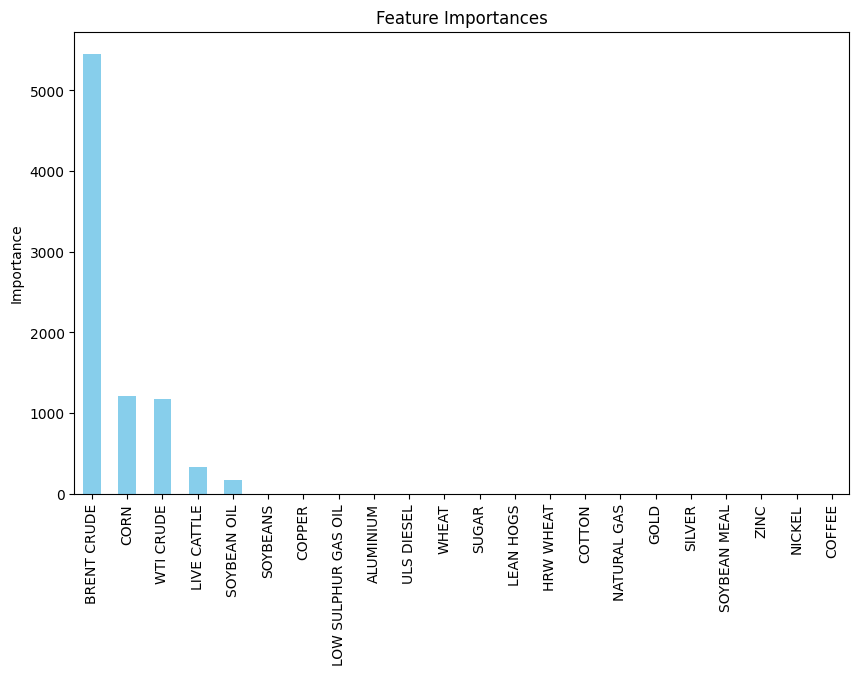

In [200]:
feature_importances_netflix = pd.Series(importances_netflix, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances_netflix.plot(kind='bar', color='skyblue')
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.show()



Here, we're printing some variables to show the accuracy of the Decision Tree model that we built. In particular, we are finding the MAE, MSE, RMSE, and R^2.

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

Y_pred = tree.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 16.938350479615153
Mean Squared Error (MSE): 971.2358298671446
Root Mean Squared Error (RMSE): 31.164656742328233
R² Score: 0.9684052255630027


### Testing the Statistical Association of BRENT CRUDE with Netflix's Adjusted Closing Price

Here, we are looking at the correlation between gold, the most important commodity, and Netflix's adjusted stock price using a Pearson correlation test. Based off of the Pearson correlation and the p-value, we see that the correlation between the two variables is a statistially significant, moderately negative correlation. This means that, if the price of brent crude oil goes up, Netflix's adjusted stock price will go down by some minute amount. Becuase of the high importance of Brent Crude Oil, we can see that it's relationship with Netflix's adjusted stock price is most liekly somewhat correlated. 

In [202]:
from scipy.stats import pearsonr

merged_netflix_usd_na = merged_netflix_usd.dropna()
corr, p_value = pearsonr(merged_netflix_usd_na['BRENT CRUDE'], merged_netflix_usd_na['Adj Close'])
print(f"Pearson Brent Crude Correlation: {corr}, P-Value: {p_value}")

Pearson Brent Crude Correlation: -0.295135320270248, P-Value: 1.080389172022197e-98


In [204]:
#Create a line graph for commodity data
#Create a line graph for commodity data
import matplotlib.pyplot as plt 

df_comm['Date'] = pd.to_dateti['NATURAL GAS', 'GOLD', 'WTI CRUDE', 'BRENT CRUDE',
       'SOYBEANS', 'CORN', 'COPPER', 'SILVER', 'LOW SULPHUR GAS OIL',
       'LIVE CATTLE', 'SOYBEAN OIL', 'ALUMINIUM', 'SOYBEAN MEAL', 'ZINC',
       'ULS DIESEL', 'NICKEL', 'WHEAT', 'SUGAR', 'GASOLINE', 'COFFEE',
       'LEAN HOGS', 'HRW WHEAT', 'COTTON'],(df_groupby('Date')[spending_columns].mean()

plt.figure(figsizee=(14,8))
for codf_comm['Date'] in spending_columnse.columnsggreate_data.indesx, aggreate_data[column], label: column

plt.title("Trends in Consumer Spending by Category, fontsize=16")
plt.xlabel("Date", fontsize=24)
plt.ylabel("Average Percent Change by Spending", fontsize=24)
plt.legend(loc="best", fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.show()

SyntaxError: '(' was never closed (2034053624.py, line 9)